In [73]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
This analysis is open source, which means that the code used to produce the graphs and outputs below is openly available.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Aphantasia survey data analysis

This is a report on the answers to the TypeForm surveys on Aphantasia.

##Background

_Aphantasia_ is the inability to form images or visual representation of ideas in the mind. It is not a disease, and we name it a condition just for lack of a better word. In fact, most people with _aphantasia_ are unaware of it. They are able to imagine and recall people, things and situations just as anybody, but their representation will be entirely abstract, a list of properties rather than a concrete image.

In 2009, a [paper](http://www.sciencedirect.com/science/article/pii/S0028393209003418) was published by Dr. Zeman of the Peninsula Medical School in Exeter, UK. Following a medical intervention, a patient had complained that they had lost the capacity to form images in their head. While he was investigating, Dr. Zeman noticed that some of the people he was talking to described a similar incapacity, only they seemed to have had since they were born.

Long story short, Dr. Zeman decided to put a lot more effort in a condition he named _aphantasia_, or the inability to form mental images. This effort culminated on a 2015 [paper in Cortex](http://www.sciencedirect.com/science/article/pii/S0010945215001781).

He analysed about 20 individuals who suffered from _aphantasia_ and 120 _controls_. The paper describes the questionnaire he used to screen individuals: the VVIQ test was created in 1973 and is composed of 16 questions. It builds a score that describes a person's ability to form mental images. The score ranges from 16 to 80; people who have the minimun score of $16$ have a complete absence of imagery, scores between $17$ and $30$ denote a milder form of _aphantasia_. 

For a psychological trait study, that sample size was relatively small. Previous estimates put the prevalence of _aphantasia_ at approximately 2-3% of the population. We wanted to give a bit more confidence to this number, so we decided to use social networks to get people to fill VVIQ questionnaires. This way, we hope to gather a bit more data on this understudied trait.

##Surveys
There were two surveys, both adapted from the original one found in the paper's methods. We kept the spirit of the original questions, while rephrasing some of them to make them suitable for social networks. [The first one](https://aphantasia.typeform.com/to/kiXjh0) was in English, the [second](https://aphantasia.typeform.com/to/aIzW30) is a translation into French.

The first survey was broadcast on the Wellcome Trust Sanger Institute and European Bioinformatics Institute mailing lists, as well on several other health-related campuses in the UK. It was also sent out on the two surveyers' Facebook accounts and on the internal mailing list of UNEP-WCMC, an environment policy consulting agency.

The second survey was also advertised on Facebook, on one of the surveyers' accounts as well as the EESI Art School's account and the ENSIMAG Computer Science School. Respondents on the French survey are mostly students from these two universities (in approximately equal parts).

Both surveys each gathered about 200 answers in two weeks, for a total of 395 answers. The data was frozen on Sunday 16th August 2015. Ten days later, the BBC did a piece on _aphantasia_, and people started retweeting our study quite a lot. However, there was an unusual concentration of cases in this most recent data, which is why we decided to keep the frozen data until the sample size has increased enough to cover that bias.

## Data overview

We start by examining the distribution of the data, pooling data from both surveys.

In [5]:
%load_ext rpy2.ipython

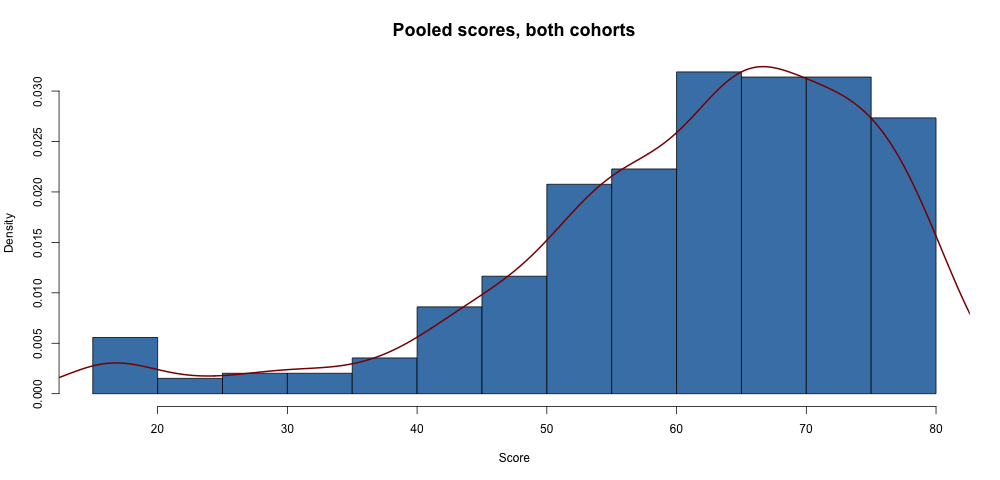

In [7]:
%%R -w 1000 -o d
library(data.table)
d=data.frame(fread("uk.csv"))
d$b=as.factor(d$b)
#levels(d$b)=c("female","male",NA)
#barplot(table(d$b))
d$c=as.factor(d$c)
#levels(d$c)=c("-15","16-25","26-35", "36-45", "46-55", "56-65", "65+")
d$x=rep("uk", nrow(d))
e=data.frame(fread("fr.csv"))
e$b=as.factor(e$b)
#levels(e$b)=c("male","female")
#barplot(table(d$b))
e$c=as.factor(e$c)
#levels(e$c)=c("16-25","26-35", "36-45")
e$x=rep("fr", nrow(e))
d=rbind(d,e)
d$a=NULL;d$t=NULL;d$v=NULL
colnames(d)=c("sex","age","1q1","1q2","1q3","1q4","2q1","2q2","2q3","2q4","3q1","3q2","3q3","3q4","4q1","4q2","4q3","4q4","date", "score","cohort")
means=apply(d, 1, function(x){mean(as.numeric(x[3:18]), na.rm=T)})
for(i in 3:18){
    d[is.na(d[,i]),i]=means[is.na(d[,i])]
}
d$score=rowSums(d[,3:18])
hist(d$score, breaks=20, col="steelblue", main="Pooled scores, both cohorts", xlab="Score", prob=T, cex.main=1.5)
lines(density(d$score), lwd=2, col="darkred")
#boxplot(d$w~d$c)
#barplot(table(d$c))


> NB: An interactive version is viewable on [plot.ly](https://plot.ly/~agilly/44/vviq-scores/?share_key=0yMhgImTWOrqv0TL45Q1Ya)

This distribution looks pretty similar to the one described in [the Cortex paper](http://www.sciencedirect.com/science/article/pii/S0010945215001781), except for the two upper bars ($VVIQ>70$). We think that this might be caused by how our participants were selected: mostly from universities and visual arts schools, which could enrich for people with extreme vividness.

Now let's examine the distribution of our two main covariates, sex and age.

[1] 2


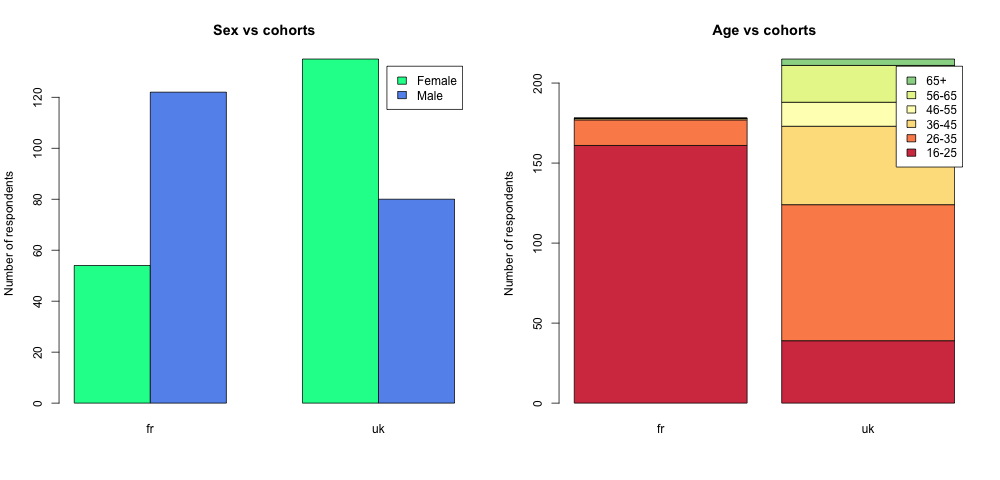

In [22]:
%%R -w 1000 -o d
library(RColorBrewer)
d$sex[d$sex != "Male" & d$sex!="Female"]=NA
d$age[d$age==""]=NA
print(length(d$age[is.na(d$age)])) 
d=droplevels(d)
par(mfrow=c(1,2))
counts=table(d$sex, d$cohort)
barplot(counts, beside=T, legend=rownames(counts), main="Sex vs cohorts", ylab="Number of respondents", col=rev(c("cornflowerblue", "mediumspringgreen")))
counts=table(d$age, d$cohort)
barplot(counts, beside=F, legend=levels(d$age), main="Age vs cohorts", ylab="Number of respondents", col=brewer.pal(7, "Spectral"))

We are strongly enriching for females in the UK cohort, and for males in the French one. The French one is also biased towards younger individuals, mostly in the 16-25 age category.

### Influence of sex and cohort

We then stratify per cohort and sex. People who answered "I'd rather not say" to the gender question were excluded from this analysis.

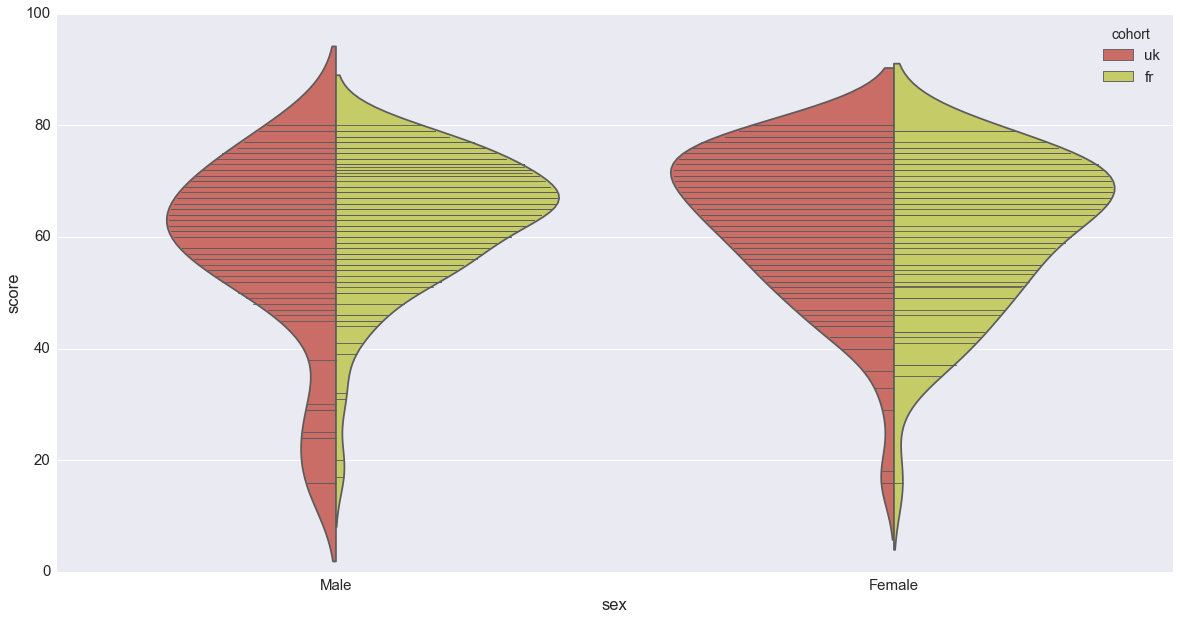

In [11]:
%matplotlib inline
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20,10)
pandas2ri.activate()
e=pandas2ri.ri2py(d)
fig, ax = plt.subplots()
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
s=sns.violinplot(x="sex", y="score",hue="cohort", data=e, split=True, inner="stick", palette=sns.color_palette("hls", 6))


#sns.countplot(x="sex", hue="cohort", data=e)
#sns.barplot(x="age", y="score", hue="cohort", data=e)

From the violin plots, we can make a certain number of observations:

* most _aphantasia_ cases, i.e. people with $VVIQ<30$ come from the UK cohort;
* in the UK cohort, males seem to have an average lower score than females; no difference can be spotted in the French cohort;
* the overall distributions are similar for both surveys, with a mode around 70 (more precise statistics are given below).

In [11]:
%%R
cat("For the UK questionnaires:\n==========================\n")
print(summary(d[d$cohort=="uk",]$score))
cat("\nFor the FR questionnaires:\n==========================\n")
summary(d[d$cohort=="fr",]$score)

For the UK questionnaires:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   54.00   63.00   60.75   72.00   80.00 

For the FR questionnaires:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   55.00   65.00   62.34   71.87   80.00 


Let's examine the overall score depending on the gender of respondents.

In [10]:
s=sns.factorplot(data=e, x="sex", y="score", col="cohort", kind="bar", palette="pastel")

We see opposing but insignificant differences in gender responses across cohorts.

### Influence of age

Next, we look at whether age has an influence over the VVIQ scores, in both cohorts and independently of sex.

In [12]:
figsize(20,10)
s=sns.boxplot(x="age", y="score", order=["16-25", "26-35", "36-45", "46-55", "56-65", "65+"], data=e, palette=sns.color_palette("husl", 7))

Given the very low number of respondents in the last category, we are unable to say anything about very old people's scores, as the distribution might not accurately represent reality. The distributions for other age categories do not seem different from each other, since their median always lies in the bulk of the others' distribution. 

This can be confirmed by the Kruskal-Wallis test (generalisation of Mann Whitney's U for more than 2 categories; this test is superior to the t-test when the population distributions are non-normal, which we cannot assume here):

In [13]:
%%R
kruskal.test(d$score~d$age, data=d)


	Kruskal-Wallis rank sum test

data:  d$score by d$age
Kruskal-Wallis chi-squared = 3.7357, df = 5, p-value = 0.5881



The p-value is very unsignificant, meaning that no age effect can be detected from the data. 

> We used all age categories here, including those for which we know we don't have enough samples to draw conclusions. If we remove the first and last categories, the p-value remains almost unchanged.


## Looking at individual questions

The VVIQ questionnaire tests visual imagery in four different areas :  a known relative, an imagined scene (sunrise), a known place, and a landscape. These areas are probed using four sub-questions. Some of these scenes appeal more to the imagination (question 2: imagine a sunrise, question 4: imagine a mountain landscape), others more to memory (question 1 is about a known relative, question 3 about a known place).

We regress overall score on scores aggregated on individual questions. If questions have a different effect, we expect slopes to be different between them.

In [15]:
e["q1"]=e["1q1"]+e["1q2"]+e["1q3"]+e["1q4"]
e["q2"]=e["2q1"]+e["2q2"]+e["2q3"]+e["2q4"]
e["q3"]=e["3q1"]+e["3q2"]+e["3q3"]+e["3q4"]
e["q4"]=e["4q1"]+e["4q2"]+e["4q3"]+e["4q4"]
s=sns.pairplot(e, x_vars=["q1", "q2", "q3", "q4"], y_vars=["score"], size=8, aspect=0.5, hue="sex", palette="pastel", kind="reg")

Responses to all four questions seem to predict the final score equally well. We also draw partial regression lines depending on sex. Men and women seem to answer the first and last question differently. Let's look at the per-question histograms.


In [16]:
%%R -o f
d$q1=rowSums(d[,3:6]);d$q2=rowSums(d[,7:10]);d$q3=rowSums(d[,11:14]);d$q4=rowSums(d[,15:18])
f=reshape(d, varying=c("q1", "q2", "q3", "q4"), v.names="partial_score", timevar="question", times=c("q1", "q2", "q3", "q4"), direction="long")

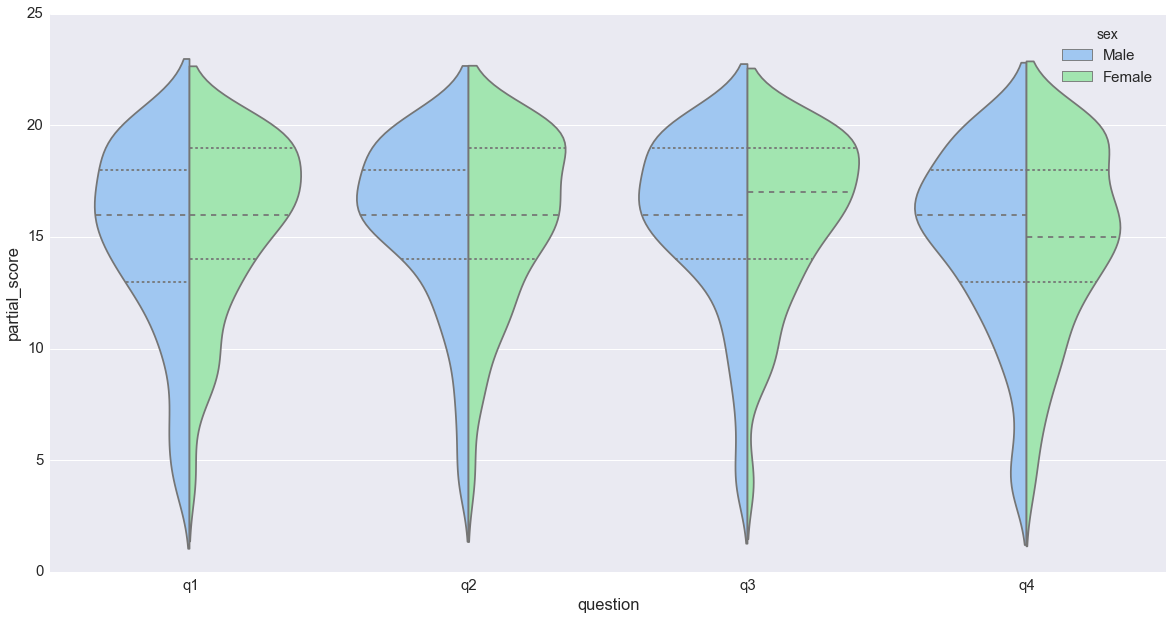

In [21]:
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
pandas2ri.activate()
g=pandas2ri.ri2py(f)
figsize(20,10)
s=sns.violinplot(x="question", y="partial_score", hue="sex", split="True", data=g, palette="pastel", inner="quartile")

There seem to be no marked difference in male/female responses between the two groups of questions (q1/q3 and q2/q4), although the imaginative questions (2 and 4) seem to be bimodal (two distinct summits to the distribution) in females. Minor differences seem to appear between individual questions despite an almost identical median, but we are probably too underpowered to detect them anyway.



## Aphantasia cases and prevalence

We define _aphantasia_ "cases" as individuals who have scored less than 30 in the $VVIQ$ test. By randomly sampling our audience populations, we observed 17 of them, which corresponds to a prevalence of $4.3\%\pm2.3\%$ using the exact binomial proportion confidence interval.

In [18]:
%%R
print(prop.test(nrow(d[d$score<30,]), nrow(d), correct=F))
binom.test(nrow(d[d$score<30,]), nrow(d))


	1-sample proportions test without continuity correction

data:  nrow(d[d$score < 30, ]) out of nrow(d), null probability 0.5
X-squared = 329.93, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.02704185 0.06783660
sample estimates:
         p 
0.04303797 


	Exact binomial test

data:  nrow(d[d$score < 30, ]) and nrow(d)
number of successes = 17, number of trials = 395, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.02526794 0.06801527
sample estimates:
probability of success 
            0.04303797 



In [19]:
%%R
cases=d[d$score<30,]
print(table(cases$sex))
binom.test(5,12+5, alternative="less")


Female   Male 
     5     12 

	Exact binomial test

data:  5 and 12 + 5
number of successes = 5, number of trials = 17, p-value = 0.07173
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.5219177
sample estimates:
probability of success 
             0.2941176 



Among cases, we have 12 males and only 5 females. This could suggest an increased prevalence in males, but the sample size is too small to reach 5% significance (binomial one-sided $p=0.07$). Half of the cases got the minimum score, which corresponds to a total absence of imagery, the rest spread almost uniformly in the $\left[17,29\right]$ interval.

## Future directions

With 17 _aphantasia_ cases, we are not able to robustly investigate influence of age, sex or other categorical factors within the affected population. The only way to perform this kind of analysis is to increase sample size, either by recruiting more cases explicitly or by taking a larger sample from the general population.

### Required sample size: a power analysis

Let's assume that the prevalence of _aphantasia_ is exactly the one we estimate: $\frac{17}{495}=4.3\%$. If we want to be able to detect differential prevalence according to sex, for example, we can guess how many samples we need to recruit using power calculations. 
We assume that we want a power of 80% and a false positive rate of 5%. We also set the effect size to 0.5, which corresponds to a medium difference between the sexes. Ideally, we would calculate power for Mann-Whitney's U-test, but to our knowledge, there is not R library to do that. We calculate the power for a two-sample t-test, bearing in mind that since Mann-Whitney's is nonparametric, it would probably need a larger sample size.

In [20]:
%%R
library(pwr)
pwr.t.test(d=0.5, sig.level=0.05, power=0.8)


     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



In the scenario that we have chosen, we would need 64 individuals of each sex among the cases to detect a medium difference in VVIQ scores between them. This corresponds to 128 cases in total. Given the prevalence we found, we calculate that $n=64\times\frac{395-17}{17}=1423$ individual responses from the general population would be needed to perform this analysis.

We can do a similar calculation if we want to detect an age effect. Here, again, there is no way to calculate the power of the Kruskal-Wallis test other than by simulation, but we can calculate power for its parametric equivalent, ANOVA. Like the t-test above, power calculation assumes equal sample sizes between age categories, which is far from what we have in our dataset. Nevertheless, for the same scenario, we can estimate the total sample size needed, when all 7 age groups are present.

In [21]:
%%R
pwr.anova.test(k=7, f=0.25, sig.level=0.05, power=0.8)


     Balanced one-way analysis of variance power calculation 

              k = 7
              n = 32.05196
              f = 0.25
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



We would need 32 individuals in each age class, a total of 224 cases. To get this number of cases, $n=224\times\frac{395-17}{17}=4979$ samples from the general population are needed. If we want to be more realistic, we can pool ages in two or three classes instead of 7.

In [69]:
%%R
print(pwr.anova.test(k=2, f=0.25, sig.level=0.05, power=0.8))
print(pwr.anova.test(k=3, f=0.25, sig.level=0.05, power=0.8))



     Balanced one-way analysis of variance power calculation 

              k = 2
              n = 63.76561
              f = 0.25
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 52.3966
              f = 0.25
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



For two classes, we need 128 cases (2847 randomly sampled individuals) for the ANOVA to reach that kind of power (but since we have only 2 classes, we could use another test). For three classes, we'd need 156 cases, or over 3467 samples from the general population.

### Heredity and pedigree study

We find the idea that a trait such as _aphantasia_ could be hereditary a very exciting one. 11 of our cases ($64\%$, vs. $40\%$ of controls) have agreed to be recontacted by e-mail, which provides a base for a pedigree-type study and highlights the interest of affected persons to learn more about this condition. Specifically targeting cases might provide the sample size to assess the heritability of _aphantasia_, which could itself pave the way for a genetic association study.

## Conclusions
Using social networks and e-mail lists, we gathered around 400 responses to the $VVIQ$ questionnaire. We established a measure of the prevalence of _aphantasia_, at $4.3\%\pm2.3\%$, but more responses are needed to investigate factors that might predispose to _aphantasia_.
Overall we felt interest for this type of study was high, especially given the high response rate we experienced in the first few days of this experiment. In the last part of this report, we outlined a few possible directions for future studies. We feel that this trait could help us learn a lot about the way the brain works, and we are glad if this mini-study can help other researchers. The data is freely available upon request (except e-mail addresses); for any questions or follow-up please contact [Arthur Gilly](mailto:arthur.gilly@sanger.ac.uk) or [Laura Huckins](mailto:laura.huckins@sanger.ac.uk).

## Bonus: Questionnaire responses over time

In [68]:
%%R -w 1000
makeTransparent = function(coul, alpha=0.5) {
  alpha = floor(255*alpha)  
  col = col2rgb(coul, alpha=FALSE)

    return(rgb(red=col[1], green=col[2], blue=col[3], alpha=alpha, maxColorValue=255))
  }

hist(as.Date(d$date[d$cohort=="uk"]), breaks="days", col=makeTransparent("darkslateblue"), main="Responses over time", xlab="Date", freq=T)
hist(as.Date(d$date[d$cohort=="fr"]), breaks="days", col=makeTransparent("orange"), add=T, axes=F, freq=T)
legend(x="topright", legend=c("UK", "FR"), fill=c(makeTransparent("darkslateblue"),makeTransparent("orange")), cex=1.4)

In [3]:
from IPython.core.display import HTML
#import urllib2
#HTML(urllib2.urlopen('https://raw.githubusercontent.com/barbagroup/CFDPython/master/styles/custom.css').read())
from IPython.core.display import HTML
styles = open("custom.css", "r").read()
HTML(styles)